In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle
import math

import numpy as np
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

#this will cause text to be exported as 'true text' which can be edited in Adobe Illustrator
pl.rcParams['pdf.fonttype']=42
pl.rcParams['ps.fonttype']=42

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
#%%javascript
#var nb = IPython.notebook;
#var kernel = IPython.notebook.kernel;
#var command = "NOTEBOOK_NAME = '" + nb.base_url + nb.notebook_path + "'";
#kernel.execute(command);

In [5]:
NOTEBOOK_NAME = 'autocorrelations_registered_vhpc'

In [6]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [7]:
all_animals  = 'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
expo_animals = np.loadtxt('../expo_mice.txt', dtype=str)
pre_animals  = np.loadtxt('../pre_mice.txt', dtype=str)
d2_animals =  'c3f3','c3f2','c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92','93'
post_animals = np.loadtxt('../post_mice.txt', dtype=str)
renew_animals ='c3f3','c3f2','c3m1', 'c3m2', 'c4m3',         'c10m8', '90', '91', '92','93','91b','92b','93b'
ext2_animals = np.loadtxt('../ext2_mice.txt', dtype=str)
ext1_animals = np.loadtxt('../ext1_mice.txt', dtype=str)

In [57]:
#find animals common to both sessions
#expopre_animals = np.intersect1d(expo_animals, pre_animals)
#expopost_animals = np.intersect1d(expo_animals, post_animals)
preVSpost_animals = np.intersect1d(pre_animals, post_animals)
preVSd2_animals = np.intersect1d(pre_animals, d2_animals)
preVSext1_animals = np.intersect1d(pre_animals, ext1_animals)
preVSext2_animals = np.intersect1d(pre_animals, ext2_animals)
preVSrenew_animals = np.intersect1d(pre_animals, renew_animals)
d2VSpost_animals = np.intersect1d(d2_animals, post_animals)
d2VSext1_animals = np.intersect1d(d2_animals, ext1_animals)
d2VSext2_animals = np.intersect1d(d2_animals, ext2_animals)
d2VSrenew_animals = np.intersect1d(d2_animals, renew_animals)
postVSext1_animals = np.intersect1d(post_animals, ext1_animals)
postVSext2_animals = np.intersect1d(post_animals, ext2_animals)
postVSrenew_animals = np.intersect1d(post_animals, renew_animals)
ext1VSext2_animals = np.intersect1d(ext1_animals, ext2_animals)
ext1VSrenew_animals = np.intersect1d(ext1_animals, renew_animals)
ext2VSrenew_animals = np.intersect1d(ext2_animals, renew_animals)

In [9]:
sessions = 'expo', 'pre','d2', 'post', 'ext1', 'ext2', 'renew'
session_labels = 'Pre','Early','Day2','Late','Ext1','Ext2','Reinstate'
dark_co = ('forestgreen','darkcyan','tab:purple','firebrick','lightgrey','dimgrey','goldenrod')

In [10]:
from itertools import product
def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
    all_of_them = {}
    for ani in animal_list:
        folder = '../%s/notebooks/autorestore/%s/' % (ani, notebook)
        all_of_them.update({ani: ut.load_variable(varname, folder)})
    return all_of_them

In [16]:
for sess in sessions[1:]:
    exec("%s_anivars = {}"%sess)
    for animal in eval("%s_animals"%sess):
        
        exec("vars_%s = {}"%sess)
        folder = '../%s/%s/notebooks/autorestore/preprocessing/' % (animal,sess)
        for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'is_CSmt', 'is_rewardt',
                    'traces','traces_raw', 'CYCLE_START', 'CS_DURATION'): 
            eval("vars_%s"%sess).update({var:ut.load_variable(var, folder=folder)})
        #eval("vars_%s"%sess).update({'time_ax_single_trunc':time_ax_single[11:]}) # create time_ax_sigle where fiirst ~3s are truncated
            
        eval("%s_anivars"%sess).update({animal:{}})
        eval("%s_anivars[animal]"%(sess)).update({eval("'vars_%s'"%sess):eval("vars_%s"%sess)})

    
    #    cellregs = dict(zip(conditions, [ut.load_cellreg_dict('../%s/data/cellreg_dict.txt' % animal, c) for c in conditions]))
    #    anivars[animal].update({'cellregs':cellregs})

In [17]:
for sess in ['expo']:
    exec("%s_anivars = {}"%sess)
    for animal in eval("%s_animals"%sess):
        exec("vars_%s = {}"%sess)
        folder = '../%s/2_odor_expo/notebooks/autorestore/preprocessing/' % (animal)
        for var in ('time_ax', 'time_ax_single', 'events', 'cycles', 'is_CSmt', 'is_rewardt',
                    'traces','traces_raw', 'CYCLE_START', 'CS_DURATION'): 
            eval("vars_%s"%sess).update({var:ut.load_variable(var, folder=folder)})
        #eval("vars_%s"%sess).update({'time_ax_single_trunc':time_ax_single[11:]}) # create time_ax_sigle where fiirst ~3s are truncated

        eval("%s_anivars"%sess).update({animal:{}})
        eval("%s_anivars[animal]"%(sess)).update({eval("'vars_%s'"%sess):eval("vars_%s"%sess)})

In [27]:
vars_pre['time_ax_single']

array([-5.        , -4.7320049 , -4.46400979, -4.19601469, -3.92801958,
       -3.66002448, -3.39202938, -3.12403427, -2.85603917, -2.58804406,
       -2.32004896, -2.05205386, -1.78405875, -1.51606365, -1.24806854,
       -0.98007344, -0.71207834, -0.44408323, -0.17608813,  0.09190698,
        0.35990208,  0.62789718,  0.89589229,  1.16388739,  1.4318825 ,
        1.6998776 ,  1.9678727 ,  2.23586781,  2.50386291,  2.77185802,
        3.03985312,  3.30784822,  3.57584333,  3.84383843,  4.11183354,
        4.37982864,  4.64782374,  4.91581885,  5.18381395,  5.45180906,
        5.71980416,  5.98779926,  6.25579437,  6.52378947,  6.79178458,
        7.05977968,  7.32777478,  7.59576989])

In [56]:
# get cellreg cells
pairs = 'preVSpost','preVSd2','preVSext1','preVSext2','preVSrenew','d2VSpost','d2VSext1','d2VSext2','d2VSrenew','postVSext1','postVSext2','postVSrenew','ext1VSext2','ext1VSrenew','ext2VSrenew'
print all_animals
animals = all_animals

for pair in pairs:
    exec("cellregs_%s = {}"%pair)
    for ani in all_animals:
        try:
            eval("cellregs_%s.update({ani:ut.load_variable('cellregs_%s',\
                 '../%s/notebooks/autorestore/decoding_all/')})" % (pair, pair, ani))
        except IOError:
            print "Empty", pair, ani

cellregs_expoVSpre = {}
for ani in expo_animals:
    try:
        eval("cellregs_expoVSpre.update({ani:ut.load_variable('cellregs_expopre',\
                 '../%s/notebooks/autorestore/decoding_expoVSall/')})" % (ani))
    except IOError:
        print "Empty cellregs_expoVSpre", ani

('c3f3', 'c3f2', 'c3m1', 'c3m2', 'c4m3', 'c4m4', 'c10m8', '90', '91', '92', '93')
Empty d2VSrenew c4m4
Empty postVSrenew c4m4
Empty ext2VSrenew c4m4


### make list of events with the following example structure:  all_amps_d2_CSm_evs[ani][cell][trial][time bin]

In [38]:
for sess in sessions:
    exec("all_amps_%s_CSm_evs={}"%sess)
    exec("all_amps_%s_Rew_evs={}"%sess)
    for animal in eval("%s_animals"%sess):
    #    cellregs = anivars[animal]['cellregs']
        exec("vars_%s = %s_anivars['%s']['vars_%s']"%(sess,sess,animal,sess))
    
        for k in eval("vars_%s.keys()"%sess):
            exec('%s = vars_%s[\'%s\']' % (k,sess,k))
    
        exec("amp_%s_CSm_evs = np.r_[[ut.compute_all_dffs(time_ax, events, cell, cycles[is_CSmt], time_ax_single)\
                        for cell in range(len(vars_%s['events'][0]))]]"%(sess,sess))
        #exec("amp_%s_CSm_evs = np.r_[[h for h in amp_%s_CSm_evs]]"%(sess,sess))
        #exec("amp_%s_CSm_evs = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in amp_%s_CSm_evs]]"%(sess,sess))
        exec("amp_%s_Rew_evs = np.r_[[ut.compute_all_dffs(time_ax, events, cell, cycles[is_rewardt], time_ax_single)\
                        for cell in range(len(vars_%s['events'][0]))]]"%(sess,sess))
        #exec("amp_%s_Rew_evs = np.r_[[np.mean(h, 0)/np.std(h, 0) if zscored else np.mean(h, 0)/np.max(h.mean(0)) for h in amp_%s_Rew_evs]]"%(sess,sess))
        
        exec("all_amps_%s_CSm_evs[animal]=amp_%s_CSm_evs"%(sess, sess))
        exec("all_amps_%s_Rew_evs[animal]=amp_%s_Rew_evs"%(sess, sess))

In [67]:
# only keep registered cells
for tt in ['Rew','CSm']:
    for pair in pairs:
        for pos,order in zip (range(2),([0,1],[1,0])):
            exec("all_amps_%s_%s_%s_evs={}"%(pair,pair.split('VS')[pos],tt))
            for ani in eval("%s_animals"%pair):
                exec("all_amps_%s_%s_%s_evs['%s']=all_amps_%s_%s_evs[ani][cellregs_%s[ani]['%s_%s']]"%(pair,pair.split('VS')[pos],
                      tt,ani,pair.split('VS')[pos],tt,pair,pair.split('VS')[order[0]],pair.split('VS')[order[1]]))
                #print "all_amps_%s_%s_%s_evs['%s']=all_amps_%s_%s_evs[ani][cellregs_%s[ani]['%s_%s']]"%(pair,pair.split('VS')[pos],
                #      tt,ani,pair.split('VS')[pos],tt,pair,pair.split('VS')[order[0]],pair.split('VS')[order[1]])

In [107]:
%%time
#split each trial into baseline and trial epochs
for epoch,s,e in zip(['base','trial'],[-4.6, 1],[0.4, 8]):
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                print 'working on %s %s %s %s   '%(epoch,pair,pair.split('VS')[pos],tt),
                exec("%s_%s_%s_%s_evs={}"%(epoch,pair,pair.split('VS')[pos],tt))
                for ani in eval("all_amps_%s_%s_%s_evs.keys()"%(pair,pair.split('VS')[pos],tt)):
                    exec("%s_%s_%s_%s_evs[ani]=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                    for cell in range(len(eval("all_amps_%s_%s_%s_evs[ani]"%(pair,pair.split('VS')[pos],tt)))):
                        exec("%s_%s_%s_%s_evs[ani].append([])"%(epoch,pair,pair.split('VS')[pos],tt))
                        for trial in range(len(eval("all_amps_%s_%s_%s_evs[ani][cell]"%(pair,pair.split('VS')[pos],tt)))):
                            exec("%s_%s_%s_%s_evs[ani][cell].append([])"%(epoch,pair,pair.split('VS')[pos],tt))
                            for tb in range(len(eval("all_amps_%s_%s_%s_evs[ani][cell][trial]"%(pair,pair.split('VS')[pos],tt)))):
                                if eval("%s_anivars[ani]['vars_%s']['time_ax_single'][tb]"%(pair.split('VS')[pos],pair.split('VS')[pos])) >= s:
                                    if eval("%s_anivars[ani]['vars_%s']['time_ax_single'][tb]"%(pair.split('VS')[pos],pair.split('VS')[pos])) <= e:
                                        #if eval("all_amps_%s_%s_evs[ani][cell][trial][tb]"%(sess,tt)) > 0.0:
                                            exec("%s_%s_%s_%s_evs[ani][cell][trial].append(all_amps_%s_%s_%s_evs[ani][cell][trial][tb])"%(epoch,pair,pair.split('VS')[pos],tt,pair,pair.split('VS')[pos],tt))

working on base preVSpost pre Rew    working on base preVSpost post Rew    working on base preVSd2 pre Rew    working on base preVSd2 d2 Rew    working on base preVSext1 pre Rew    working on base preVSext1 ext1 Rew    working on base preVSext2 pre Rew    working on base preVSext2 ext2 Rew    working on base preVSrenew pre Rew    working on base preVSrenew renew Rew    working on base d2VSpost d2 Rew    working on base d2VSpost post Rew    working on base d2VSext1 d2 Rew    working on base d2VSext1 ext1 Rew    working on base d2VSext2 d2 Rew    working on base d2VSext2 ext2 Rew    working on base d2VSrenew d2 Rew    working on base d2VSrenew renew Rew    working on base postVSext1 post Rew    working on base postVSext1 ext1 Rew    working on base postVSext2 post Rew    working on base postVSext2 ext2 Rew    working on base postVSrenew post Rew    working on base postVSrenew renew Rew    working on base ext1VSext2 ext1 Rew    working on base ext1VSext2 ext2 Rew    working on base ext1VS

In [188]:
%%time
#get autocorrelation of every trial, for every cell, for every animal
for epoch in ['base','trial']:
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                print 'working on %s %s %s %s  '%(epoch,pair,pair.split('VS')[pos],tt),
                exec("autocorr_%s_%s_%s_%s_evs={}"%(epoch,pair,pair.split('VS')[pos],tt))
                for ani in eval("all_amps_%s_%s_%s_evs.keys()"%(pair,pair.split('VS')[pos],tt)):
                    exec("autocorr_%s_%s_%s_%s_evs[ani]=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                    for cell in range(len(eval("all_amps_%s_%s_%s_evs[ani]"%(pair,pair.split('VS')[pos],tt)))):
                        exec("autocorr_%s_%s_%s_%s_evs[ani].append([])"%(epoch,pair,pair.split('VS')[pos],tt))
                        for trial in range(len(eval("all_amps_%s_%s_%s_evs[ani][cell]"%(pair,pair.split('VS')[pos],tt)))):
                            # don't include trials where cell didn't fire
                            if np.mean(eval("%s_%s_%s_%s_evs[ani][cell][trial]"%(epoch,pair,pair.split('VS')[pos],tt))) > 0:
                                exec("ac = np.correlate(%s_%s_%s_%s_evs[ani][cell][trial],%s_%s_%s_%s_evs[ani][cell][trial],mode='full')"%(epoch,pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))
                                # throw away distant time lag comparisons (only keep middle 35). This is also necessary to standardize the no. of tbs across animals
                                ta = len(eval("%s_%s_%s_%s_evs[ani][cell][trial]"%(epoch,pair,pair.split('VS')[pos],tt))) - 18
                                exec("autocorr_%s_%s_%s_%s_evs[ani][cell].append((ac/np.max(ac))[ta:-ta])"%(epoch,pair,pair.split('VS')[pos],tt))
first_run=True

working on base preVSpost pre Rew   working on base preVSpost post Rew   working on base preVSd2 pre Rew   working on base preVSd2 d2 Rew   working on base preVSext1 pre Rew   working on base preVSext1 ext1 Rew   working on base preVSext2 pre Rew   working on base preVSext2 ext2 Rew   working on base preVSrenew pre Rew   working on base preVSrenew renew Rew   working on base d2VSpost d2 Rew   working on base d2VSpost post Rew   working on base d2VSext1 d2 Rew   working on base d2VSext1 ext1 Rew   working on base d2VSext2 d2 Rew   working on base d2VSext2 ext2 Rew   working on base d2VSrenew d2 Rew   working on base d2VSrenew renew Rew   working on base postVSext1 post Rew   working on base postVSext1 ext1 Rew   working on base postVSext2 post Rew   working on base postVSext2 ext2 Rew   working on base postVSrenew post Rew   working on base postVSrenew renew Rew   working on base ext1VSext2 ext1 Rew   working on base ext1VSext2 ext2 Rew   working on base ext1VSrenew ext1 Rew   working o

In [189]:
#remove cells that have no activity
if first_run==True:
    #you can only run the below once. Must rereun cell above before doing again.
    for epoch in ['base','trial']:
        for tt in ['Rew','CSm']:
            for pair in pairs:
                for pos in range(2):
                    for x in eval("autocorr_%s_%s_%s_%s_evs.keys()"%(epoch,pair,pair.split('VS')[pos],tt)):
                        c=0
                        for y in range(len(eval("autocorr_%s_%s_%s_%s_evs[x]"%(epoch,pair,pair.split('VS')[pos],tt)))):
                            #n=0
                            if len(eval("autocorr_%s_%s_%s_%s_evs[x][y-c]"%(epoch,pair,pair.split('VS')[pos],tt)))==0:
                                #if np.mean(eval("%s_%s_%s_%s_evs[x][y][z]"%(epoch,pair,pair.split('VS')[pos],tt))) < 0.00000001:
                                #    n=n+1
                            #if n==len(eval("autocorr_%s_%s_%s_%s_evs[x][y]"%(epoch,pair,pair.split('VS')[pos],tt))):
                                print "%s_%s_%s_%s[%s][%s]"%(epoch,pair,pair.split('VS')[pos],tt,x,y-c),
                                print eval("autocorr_%s_%s_%s_%s_evs[x][%s]"%(epoch,pair,pair.split('VS')[pos],tt,y-c))
                                exec("for_del = autocorr_%s_%s_%s_%s_evs"%(epoch,pair,pair.split('VS')[pos],tt))
                                #print for_del
                                del for_del[x][y-c]
                                print "deleted autocorr_%s_%s_%s_%s[%s][%s]"%(epoch,pair,pair.split('VS')[pos],tt,x,y-c)
                                c=c+1  # since a cell has now been deleted, must subtract off that index position for the next deletion
first_run=False

base_preVSpost_post_Rew[c4m3][14] []
deleted autocorr_base_preVSpost_post_Rew[c4m3][14]
base_d2VSpost_d2_Rew[91][11] []
deleted autocorr_base_d2VSpost_d2_Rew[91][11]
base_d2VSpost_post_Rew[c4m3][15] []
deleted autocorr_base_d2VSpost_post_Rew[c4m3][15]
base_d2VSext1_d2_Rew[91][10] []
deleted autocorr_base_d2VSext1_d2_Rew[91][10]
base_d2VSext2_d2_Rew[91][12] []
deleted autocorr_base_d2VSext2_d2_Rew[91][12]
base_d2VSext2_ext2_Rew[c4m3][19] []
deleted autocorr_base_d2VSext2_ext2_Rew[c4m3][19]
base_postVSext1_post_Rew[c4m3][13] []
deleted autocorr_base_postVSext1_post_Rew[c4m3][13]
base_postVSext2_post_Rew[c4m3][17] []
deleted autocorr_base_postVSext2_post_Rew[c4m3][17]
base_postVSext2_ext2_Rew[c4m3][15] []
deleted autocorr_base_postVSext2_ext2_Rew[c4m3][15]
base_postVSrenew_post_Rew[c4m3][16] []
deleted autocorr_base_postVSrenew_post_Rew[c4m3][16]
base_ext1VSext2_ext1_Rew[92][41] []
deleted autocorr_base_ext1VSext2_ext1_Rew[92][41]
base_ext2VSrenew_ext2_Rew[c4m3][25] []
deleted autocorr_ba

In [190]:
#check to make sure all empty cells have been removed. NOTHING SHOULD PRINT OUT.
for epoch in ['base','trial']:
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                for ani in eval("autocorr_%s_%s_%s_%s_evs.keys()"%(epoch,pair,pair.split('VS')[pos],tt)):
                    for y in range(len(eval("autocorr_%s_%s_%s_%s_evs[ani]"%(epoch,pair,pair.split('VS')[pos],tt)))):
                        if np.mean(eval("autocorr_%s_%s_%s_%s_evs[ani][y]"%(epoch,pair,pair.split('VS')[pos],tt))) >= 0.0000000001:
                            i=0 # just a random operation to fulfill the requirement to do "something" here
                        else:
                            print epoch,pair,pair.split('VS')[pos],tt,ani,y

In [199]:
%%time
#get the means for each level of anlaysis (trials, cells, animals)
for epoch in ['base','trial']:
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                print 'working on %s %s %s %s   '%(epoch,pair,pair.split('VS')[pos],tt),
                exec("autocorr_meanoftrials_%s_%s_%s_%s_evs={}"%(epoch,pair,pair.split('VS')[pos],tt))
                exec("autocorr_meanofcells_%s_%s_%s_%s_evs=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                for ani in eval("all_amps_%s_%s_%s_evs.keys()"%(pair,pair.split('VS')[pos],tt)):
                    exec("autocorr_meanoftrials_%s_%s_%s_%s_evs[ani]=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                    for cell in range(len(eval("autocorr_%s_%s_%s_%s_evs[ani]"%(epoch,pair,pair.split('VS')[pos],tt)))):
                #only include cells that have some activity
                        if np.mean(eval("autocorr_%s_%s_%s_%s_evs[ani][cell]"%(epoch,pair,pair.split('VS')[pos],tt)))>0:
                #for each cell, get the mean over all trials
                            exec("autocorr_meanoftrials_%s_%s_%s_%s_evs[ani].append(np.mean(autocorr_%s_%s_%s_%s_evs[ani][cell],0))"%(epoch,
                                                               pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))
                #for each animal, take the mean of all cells
                        if np.mean(eval("autocorr_%s_%s_%s_%s_evs[ani][cell]"%(epoch,pair,pair.split('VS')[pos],tt)))>0: 
                            exec("autocorr_meanofcells_%s_%s_%s_%s_evs.append(np.mean(autocorr_meanoftrials_%s_%s_%s_%s_evs[ani],0))"%(epoch,
                                                               pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))
                #get the mean of the whole pseudopopulation
                    exec("autocorr_overallmean_%s_%s_%s_%s_evs = np.mean(autocorr_meanofcells_%s_%s_%s_%s_evs,0)"%(epoch,
                                                               pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))

 working on base preVSpost pre Rew    working on base preVSpost post Rew    working on base preVSd2 pre Rew    working on base preVSd2 d2 Rew    working on base preVSext1 pre Rew    working on base preVSext1 ext1 Rew    working on base preVSext2 pre Rew    working on base preVSext2 ext2 Rew    working on base preVSrenew pre Rew    working on base preVSrenew renew Rew    working on base d2VSpost d2 Rew    working on base d2VSpost post Rew    working on base d2VSext1 d2 Rew    working on base d2VSext1 ext1 Rew    working on base d2VSext2 d2 Rew    working on base d2VSext2 ext2 Rew    working on base d2VSrenew d2 Rew    working on base d2VSrenew renew Rew    working on base postVSext1 post Rew    working on base postVSext1 ext1 Rew    working on base postVSext2 post Rew    working on base postVSext2 ext2 Rew    working on base postVSrenew post Rew    working on base postVSrenew renew Rew    working on base ext1VSext2 ext1 Rew    working on base ext1VSext2 ext2 Rew    working on base ext1V

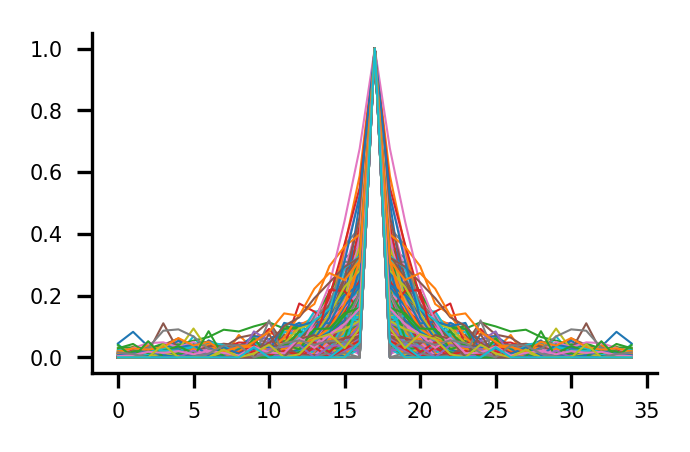

In [201]:
for x in autocorr_meanoftrials_trial_preVSpost_post_Rew_evs.keys():
    for y in range(len(autocorr_meanoftrials_trial_preVSpost_post_Rew_evs[x])):
        pl.plot(autocorr_meanoftrials_trial_preVSpost_post_Rew_evs[x][y])

R² = 0.992150309948
Y = 0.978140677193 * e^( -1.43816359797 * x) + 0.0182943004671
Tau = 0.185421649556 sec


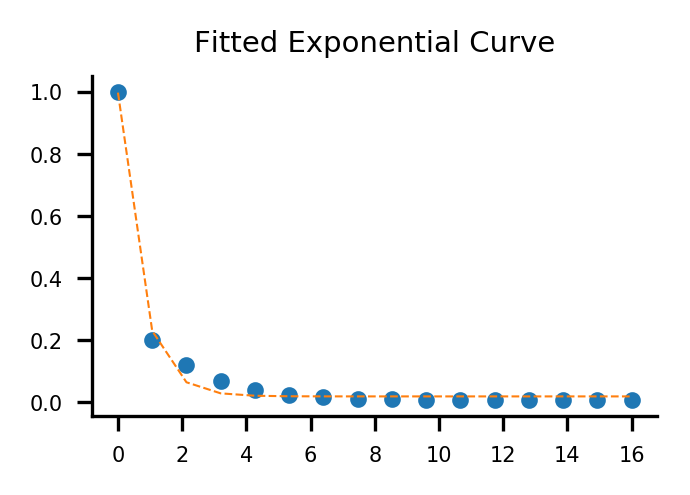

In [202]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

import scipy.optimize

xs = np.linspace(0,16,16) # lag of 20 bins
ys = autocorr_overallmean_trial_preVSpost_post_Rew_evs[17:33]

# perform the fit
p0 = (1,0,0) # start with values near those we expect (starting value, starting x bin, ending value (decays to what?))
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 3.75 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print "R² =", rSquared

# plot the results
pl.plot(xs, ys, '.', label="data")
pl.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
pl.title("Fitted Exponential Curve")

# inspect the parameters
print "Y =", m, "* e^(",-t,"* x) +", b
print "Tau =", tauSec, "sec"

In [215]:
#fit each cell's autocorrelation with an exponential decay function. Store the R2 and the tau time constant (t) for comparison later

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

import scipy.optimize

n=0
xs = np.linspace(0,16,16) # lag of 20 bins
p0 = (1,0.25,0) # start with values near those we expect (starting value, starting x bin, ending value (decays to what?))
sampleRate = 3.75 # Hz

for epoch in ['base','trial']:
    for tt in ['CSm','Rew']:
        for pair in pairs:
            for pos in range(2):
                exec("decay_%s_%s_%s_%s = {}"%(epoch,pair,pair.split('VS')[pos],tt))
                exec("decay_%s_%s_%s_%s['r2']=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                exec("decay_%s_%s_%s_%s['tau']=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                print 'working on %s %s %s_%s   '%(epoch,pair,pair.split('VS')[pos],tt),
                for x in range(len(eval("autocorr_meanofcells_%s_%s_%s_%s_evs"%(epoch,pair,pair.split('VS')[pos],tt)))):
                    ys =eval("autocorr_meanofcells_%s_%s_%s_%s_evs[x][17:33]"%(epoch,pair,pair.split('VS')[pos],tt))
                    try:
                        # perform the fit
                        params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
                        m, t, b = params
                        tauSec = (1 / t) / sampleRate
                        
                        # determine quality of the fit
                        squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
                        squaredDiffsFromMean = np.square(ys - np.mean(ys))
                        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
                        exec("decay_%s_%s_%s_%s['r2'].append(rSquared)"%(epoch,pair,pair.split('VS')[pos],tt))
                        exec("decay_%s_%s_%s_%s['tau'].append(t)"%(epoch,pair,pair.split('VS')[pos],tt))
                    except:
                        print "skip cell",x
                        n=n+1
print "\nskipped",n,"cells"

working on base preVSpost pre_CSm    working on base preVSpost post_CSm    skip cell 0
skip cell 203
working on base preVSd2 pre_CSm    working on base preVSd2 d2_CSm    working on base preVSext1 pre_CSm    working on base preVSext1 ext1_CSm    working on base preVSext2 pre_CSm    working on base preVSext2 ext2_CSm    working on base preVSrenew pre_CSm    working on base preVSrenew renew_CSm    skip cell 0
working on base d2VSpost d2_CSm    working on base d2VSpost post_CSm    skip cell 0
skip cell 212
working on base d2VSext1 d2_CSm    working on base d2VSext1 ext1_CSm    working on base d2VSext2 d2_CSm    skip cell 59
working on base d2VSext2 ext2_CSm    working on base d2VSrenew d2_CSm    working on base d2VSrenew renew_CSm    skip cell 0
working on base postVSext1 post_CSm    working on base postVSext1 ext1_CSm    working on base postVSext2 post_CSm    working on base postVSext2 ext2_CSm    working on base postVSrenew post_CSm    working on base postVSrenew renew_CSm    working on 

In [ ]:
#method that didn't work

#import statsmodels.api as sm
#from statsmodels.graphics.tsaplots import plot_acf

##calculate autocorrelations
#sm.tsa.acf(all_amps_d2_CSm_evs[0][0][0])

# Now same analysis, but only using first 15 trials of each trial type (to n-match expo session)

In [206]:
%%time
#get first15_autocorrelation of first 15 trials, for every cell, for every animal
for epoch in ['base','trial']:
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                print 'working on %s %s %s %s  '%(epoch,pair,pair.split('VS')[pos],tt),
                exec("first15_autocorr_%s_%s_%s_%s_evs={}"%(epoch,pair,pair.split('VS')[pos],tt))
                for ani in eval("all_amps_%s_%s_%s_evs.keys()"%(pair,pair.split('VS')[pos],tt)):
                    exec("first15_autocorr_%s_%s_%s_%s_evs[ani]=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                    for cell in range(len(eval("all_amps_%s_%s_%s_evs[ani]"%(pair,pair.split('VS')[pos],tt)))):
                        exec("first15_autocorr_%s_%s_%s_%s_evs[ani].append([])"%(epoch,pair,pair.split('VS')[pos],tt))
                        for trial in range(15):
                            # don't include trials where cell didn't fire
                            if np.mean(eval("%s_%s_%s_%s_evs[ani][cell][trial]"%(epoch,pair,pair.split('VS')[pos],tt))) > 0:
                                exec("ac = np.correlate(%s_%s_%s_%s_evs[ani][cell][trial],%s_%s_%s_%s_evs[ani][cell][trial],mode='full')"%(epoch,pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))
                                # throw away distant time lag comparisons (only keep middle 35). This is also necessary to standardize the no. of tbs across animals
                                ta = len(eval("%s_%s_%s_%s_evs[ani][cell][trial]"%(epoch,pair,pair.split('VS')[pos],tt))) - 18
                                exec("first15_autocorr_%s_%s_%s_%s_evs[ani][cell].append((ac/np.max(ac))[ta:-ta])"%(epoch,pair,pair.split('VS')[pos],tt))
first_run=True

working on base preVSpost pre Rew   working on base preVSpost post Rew   working on base preVSd2 pre Rew   working on base preVSd2 d2 Rew   working on base preVSext1 pre Rew   working on base preVSext1 ext1 Rew   working on base preVSext2 pre Rew   working on base preVSext2 ext2 Rew   working on base preVSrenew pre Rew   working on base preVSrenew renew Rew   working on base d2VSpost d2 Rew   working on base d2VSpost post Rew   working on base d2VSext1 d2 Rew   working on base d2VSext1 ext1 Rew   working on base d2VSext2 d2 Rew   working on base d2VSext2 ext2 Rew   working on base d2VSrenew d2 Rew   working on base d2VSrenew renew Rew   working on base postVSext1 post Rew   working on base postVSext1 ext1 Rew   working on base postVSext2 post Rew   working on base postVSext2 ext2 Rew   working on base postVSrenew post Rew   working on base postVSrenew renew Rew   working on base ext1VSext2 ext1 Rew   working on base ext1VSext2 ext2 Rew   working on base ext1VSrenew ext1 Rew   working o

In [207]:
#remove cells that have no activity
if first_run==True:
    #you can only run the below once. Must rereun cell above before doing again.
    for epoch in ['base','trial']:
        for tt in ['Rew','CSm']:
            for pair in pairs:
                for pos in range(2):
                    for x in eval("first15_autocorr_%s_%s_%s_%s_evs.keys()"%(epoch,pair,pair.split('VS')[pos],tt)):
                        c=0
                        for y in range(len(eval("first15_autocorr_%s_%s_%s_%s_evs[x]"%(epoch,pair,pair.split('VS')[pos],tt)))):
                            #n=0
                            if len(eval("first15_autocorr_%s_%s_%s_%s_evs[x][y-c]"%(epoch,pair,pair.split('VS')[pos],tt)))==0:
                                #if np.mean(eval("%s_%s_%s_%s_evs[x][y][z]"%(epoch,pair,pair.split('VS')[pos],tt))) < 0.00000001:
                                #    n=n+1
                            #if n==len(eval("first15_autocorr_%s_%s_%s_%s_evs[x][y]"%(epoch,pair,pair.split('VS')[pos],tt))):
                                print "%s_%s_%s_%s[%s][%s]"%(epoch,pair,pair.split('VS')[pos],tt,x,y-c),
                                print eval("first15_autocorr_%s_%s_%s_%s_evs[x][%s]"%(epoch,pair,pair.split('VS')[pos],tt,y-c))
                                exec("for_del = first15_autocorr_%s_%s_%s_%s_evs"%(epoch,pair,pair.split('VS')[pos],tt))
                                #print for_del
                                del for_del[x][y-c]
                                print "deleted first15_autocorr_%s_%s_%s_%s[%s][%s]"%(epoch,pair,pair.split('VS')[pos],tt,x,y-c)
                                c=c+1  # since a cell has now been deleted, must subtract off that index position for the next deletion
first_run=False

base_preVSpost_pre_Rew[c3f3][8] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c3f3][8]
base_preVSpost_pre_Rew[c3f3][9] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c3f3][9]
base_preVSpost_pre_Rew[c3f3][9] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c3f3][9]
base_preVSpost_pre_Rew[c3f3][12] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c3f3][12]
base_preVSpost_pre_Rew[c3f3][12] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c3f3][12]
base_preVSpost_pre_Rew[c10m8][5] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c10m8][5]
base_preVSpost_pre_Rew[c10m8][6] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c10m8][6]
base_preVSpost_pre_Rew[c10m8][10] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c10m8][10]
base_preVSpost_pre_Rew[c10m8][13] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c10m8][13]
base_preVSpost_pre_Rew[c10m8][14] []
deleted first15_autocorr_base_preVSpost_pre_Rew[c10m8][14]
base_preVSpost_pre_Rew[90][17] []
deleted first15_autocorr_b

In [208]:
#check to make sure all empty cells have been removed. NOTHING SHOULD PRINT OUT.
for epoch in ['base','trial']:
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                for ani in eval("first15_autocorr_%s_%s_%s_%s_evs.keys()"%(epoch,pair,pair.split('VS')[pos],tt)):
                    for y in range(len(eval("first15_autocorr_%s_%s_%s_%s_evs[ani]"%(epoch,pair,pair.split('VS')[pos],tt)))):
                        if np.mean(eval("first15_autocorr_%s_%s_%s_%s_evs[ani][y]"%(epoch,pair,pair.split('VS')[pos],tt))) >= 0.0000000001:
                            i=0 # just a random operation to fulfill the requirement to do "something" here
                        else:
                            print epoch,pair,pair.split('VS')[pos],tt,ani,y

In [209]:
%%time
#get the means for each level of anlaysis (trials, cells, animals)
for epoch in ['base','trial']:
    for tt in ['Rew','CSm']:
        for pair in pairs:
            for pos in range(2):
                print 'working on %s %s %s %s   '%(epoch,pair,pair.split('VS')[pos],tt),
                exec("first15_autocorr_meanoftrials_%s_%s_%s_%s_evs={}"%(epoch,pair,pair.split('VS')[pos],tt))
                exec("first15_autocorr_meanofcells_%s_%s_%s_%s_evs=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                for ani in eval("all_amps_%s_%s_%s_evs.keys()"%(pair,pair.split('VS')[pos],tt)):
                    exec("first15_autocorr_meanoftrials_%s_%s_%s_%s_evs[ani]=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                    for cell in range(len(eval("first15_autocorr_%s_%s_%s_%s_evs[ani]"%(epoch,pair,pair.split('VS')[pos],tt)))):
                #only include cells that have some activity
                        if np.mean(eval("first15_autocorr_%s_%s_%s_%s_evs[ani][cell]"%(epoch,pair,pair.split('VS')[pos],tt)))>0:
                #for each cell, get the mean over all trials
                            exec("first15_autocorr_meanoftrials_%s_%s_%s_%s_evs[ani].append(np.mean(first15_autocorr_%s_%s_%s_%s_evs[ani][cell],0))"%(epoch,
                                                               pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))
                #for each animal, take the mean of all cells
                        if np.mean(eval("first15_autocorr_%s_%s_%s_%s_evs[ani][cell]"%(epoch,pair,pair.split('VS')[pos],tt)))>0: 
                            exec("first15_autocorr_meanofcells_%s_%s_%s_%s_evs.append(np.mean(first15_autocorr_meanoftrials_%s_%s_%s_%s_evs[ani],0))"%(epoch,
                                                               pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))
                #get the mean of the whole pseudopopulation
                    exec("first15_autocorr_overallmean_%s_%s_%s_%s_evs = np.mean(first15_autocorr_meanofcells_%s_%s_%s_%s_evs,0)"%(epoch,
                                                               pair,pair.split('VS')[pos],tt,epoch,pair,pair.split('VS')[pos],tt))

working on base preVSpost pre Rew    working on base preVSpost post Rew    working on base preVSd2 pre Rew    working on base preVSd2 d2 Rew    working on base preVSext1 pre Rew    working on base preVSext1 ext1 Rew    working on base preVSext2 pre Rew    working on base preVSext2 ext2 Rew    working on base preVSrenew pre Rew    working on base preVSrenew renew Rew    working on base d2VSpost d2 Rew    working on base d2VSpost post Rew    working on base d2VSext1 d2 Rew    working on base d2VSext1 ext1 Rew    working on base d2VSext2 d2 Rew    working on base d2VSext2 ext2 Rew    working on base d2VSrenew d2 Rew    working on base d2VSrenew renew Rew    working on base postVSext1 post Rew    working on base postVSext1 ext1 Rew    working on base postVSext2 post Rew    working on base postVSext2 ext2 Rew    working on base postVSrenew post Rew    working on base postVSrenew renew Rew    working on base ext1VSext2 ext1 Rew    working on base ext1VSext2 ext2 Rew    working on base ext1VS

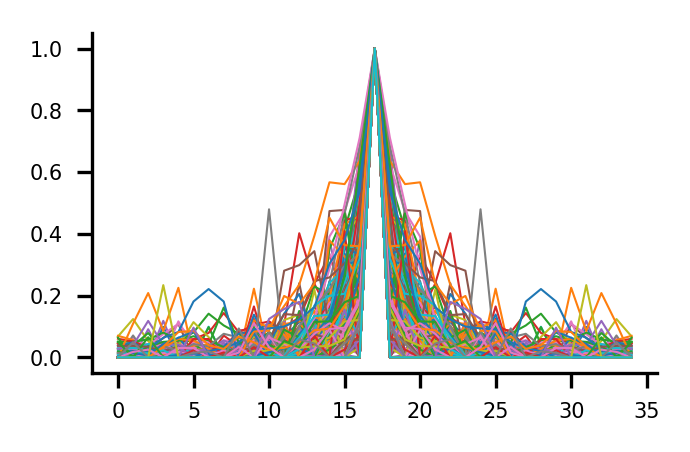

In [210]:
for x in first15_autocorr_meanoftrials_trial_preVSpost_post_Rew_evs.keys():
    for y in range(len(first15_autocorr_meanoftrials_trial_preVSpost_post_Rew_evs[x])):
        pl.plot(first15_autocorr_meanoftrials_trial_preVSpost_post_Rew_evs[x][y])

R² = 0.991962717484
Y = 0.97673860514 * e^( -1.39104255561 * x) + 0.0193297951747
Tau = 0.191702738059 sec


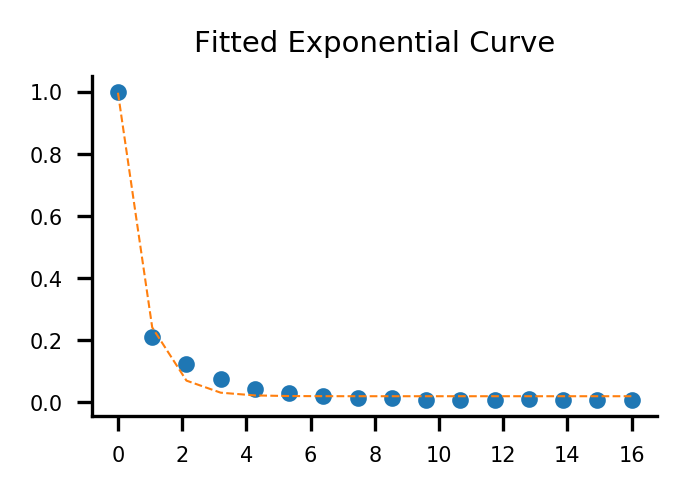

In [211]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

import scipy.optimize

xs = np.linspace(0,16,16) # lag of 20 bins
ys = first15_autocorr_overallmean_trial_preVSpost_post_Rew_evs[17:33]

# perform the fit
p0 = (1,0,0) # start with values near those we expect (starting value, starting x bin, ending value (decays to what?))
params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
m, t, b = params
sampleRate = 3.75 # Hz
tauSec = (1 / t) / sampleRate

# determine quality of the fit
squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print "R² =", rSquared

# plot the results
pl.plot(xs, ys, '.', label="data")
pl.plot(xs, monoExp(xs, m, t, b), '--', label="fitted")
pl.title("Fitted Exponential Curve")

# inspect the parameters
print "Y =", m, "* e^(",-t,"* x) +", b
print "Tau =", tauSec, "sec"

In [214]:
#fit each cell's first15_autocorrelation with an exponential decay function. Store the R2 and the tau time constant (t) for comparison later

def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

import scipy.optimize

n=0
xs = np.linspace(0,16,16) # lag of 20 bins
p0 = (1,0.25,0) # start with values near those we expect (starting value, starting x bin, ending value (decays to what?))
sampleRate = 3.75 # Hz

for epoch in ['base','trial']:
    for tt in ['CSm','Rew']:
        for pair in pairs:
            for pos in range(2):
                exec("first15_decay_%s_%s_%s_%s = {}"%(epoch,pair,pair.split('VS')[pos],tt))
                exec("first15_decay_%s_%s_%s_%s['r2']=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                exec("first15_decay_%s_%s_%s_%s['tau']=[]"%(epoch,pair,pair.split('VS')[pos],tt))
                print 'working on %s %s %s_%s   '%(epoch,pair,pair.split('VS')[pos],tt),
                for x in range(len(eval("first15_autocorr_meanofcells_%s_%s_%s_%s_evs"%(epoch,pair,pair.split('VS')[pos],tt)))):
                    ys =eval("first15_autocorr_meanofcells_%s_%s_%s_%s_evs[x][17:33]"%(epoch,pair,pair.split('VS')[pos],tt))
                    try:
                        # perform the fit
                        params, cv = scipy.optimize.curve_fit(monoExp, xs, ys, p0)
                        m, t, b = params
                        tauSec = (1 / t) / sampleRate
                        
                        # determine quality of the fit
                        squaredDiffs = np.square(ys - monoExp(xs, m, t, b))
                        squaredDiffsFromMean = np.square(ys - np.mean(ys))
                        rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
                        exec("first15_decay_%s_%s_%s_%s['r2'].append(rSquared)"%(epoch,pair,pair.split('VS')[pos],tt))
                        exec("first15_decay_%s_%s_%s_%s['tau'].append(t)"%(epoch,pair,pair.split('VS')[pos],tt))
                    except:
                        print "skip cell",x
                        n=n+1
print "\nskipped",n,"cells"

working on base preVSpost pre_CSm    skip cell 126
working on base preVSpost post_CSm    skip cell 24
skip cell 124
skip cell 181
skip cell 196
working on base preVSd2 pre_CSm    skip cell 160
skip cell 230
working on base preVSd2 d2_CSm    working on base preVSext1 pre_CSm    skip cell 133
working on base preVSext1 ext1_CSm    skip cell 20
skip cell 51
skip cell 58
skip cell 177
working on base preVSext2 pre_CSm    working on base preVSext2 ext2_CSm    skip cell 193
working on base preVSrenew pre_CSm    skip cell 144
working on base preVSrenew renew_CSm    skip cell 0
skip cell 1
skip cell 142
skip cell 199
working on base d2VSpost d2_CSm    skip cell 53
working on base d2VSpost post_CSm    skip cell 27
skip cell 28
skip cell 53
skip cell 54
skip cell 55
skip cell 191
skip cell 192
working on base d2VSext1 d2_CSm    skip cell 65
working on base d2VSext1 ext1_CSm    skip cell 17
skip cell 130
skip cell 202
working on base d2VSext2 d2_CSm    skip cell 133
working on base d2VSext2 ext2_C

In [216]:
save_workspace(db)

Could not store variable 'math'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'di'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'scipy'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'sys'. Skipping...
Could not store variable 'ut'. Skipping...


# If want to look at averaged activity bins instead, can start with the following

#get patterns of CellReg'd cells
expopre_patterns_expo_first30 = load_all_animals_vars('patterns_evs_expopre', expopre_animals, '', notebook='decoding_expoVSpre_30trials')          
expopre_patterns_pre_first30 = load_all_animals_vars('patterns_evs_pre_first30', expopre_animals, '', notebook='decoding_expoVSpre_30trials')                                            
expopre_labels_expo_first30 = load_all_animals_vars('labels_expo',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
expopre_labels_pre_first30 = load_all_animals_vars('labels_pre_first30',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
prepost_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_post', prepost_animals, '', notebook='patterns_time_bins')             
prepost_patterns_post = load_all_animals_vars('patterns_evs_1s_post_pre', prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_pre = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_post = load_all_animals_vars('labels_post',prepost_animals, '', notebook='patterns_time_bins')
preext1_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext1', preext1_animals, '', notebook='patterns_time_bins')             
preext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_pre', preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_pre = load_all_animals_vars('labels_pre',preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_ext1 = load_all_animals_vars('labels_ext1',preext1_animals, '', notebook='patterns_time_bins')
preext2_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_ext2', preext2_animals, '', notebook='patterns_time_bins')             
preext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_pre', preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_pre = load_all_animals_vars('labels_pre',preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_ext2 = load_all_animals_vars('labels_ext2',preext2_animals, '', notebook='patterns_time_bins')
prerenew_patterns_pre = load_all_animals_vars('patterns_evs_1s_pre_renew', prerenew_animals, '', notebook='patterns_time_bins')             
prerenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_pre', prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_pre = load_all_animals_vars('labels_pre',prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_renew = load_all_animals_vars('labels_renew',prerenew_animals, '', notebook='patterns_time_bins')
postext1_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext1_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_post = load_all_animals_vars('labels_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_ext1 = load_all_animals_vars('labels_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext2_patterns_post = load_all_animals_vars('patterns_evs_1s_post_ext2',postext2_animals, '', notebook='patterns_time_bins')
postext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_post = load_all_animals_vars('labels_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_ext2 = load_all_animals_vars('labels_ext2',postext2_animals, '', notebook='patterns_time_bins')
postrenew_patterns_post = load_all_animals_vars('patterns_evs_1s_post_renew',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_post = load_all_animals_vars('labels_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_renew = load_all_animals_vars('labels_renew',postrenew_animals, '', notebook='patterns_time_bins')
ext1ext2_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_ext2', ext1ext2_animals, '', notebook='patterns_time_bins')             
ext1ext2_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_ext1', ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext1 = load_all_animals_vars('labels_ext1',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext2 = load_all_animals_vars('labels_ext2',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1renew_patterns_ext1 = load_all_animals_vars('patterns_evs_1s_ext1_renew', ext1renew_animals, '', notebook='patterns_time_bins')             
ext1renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext1', ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_ext1 = load_all_animals_vars('labels_ext1',ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_renew = load_all_animals_vars('labels_renew',ext1renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_renew = load_all_animals_vars('patterns_evs_1s_renew_ext2',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_ext2 = load_all_animals_vars('patterns_evs_1s_ext2_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_renew = load_all_animals_vars('labels_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_ext2 = load_all_animals_vars('labels_ext2',ext2renew_animals, '', notebook='patterns_time_bins')


#get patterns of CellReg'd cells
expopre_patterns_expo_first30_05s = load_all_animals_vars('patterns_evs_expopre', expopre_animals, '', notebook='decoding_expoVSpre_30trials')          
expopre_patterns_pre_first30_05s = load_all_animals_vars('patterns_evs_pre_first30', expopre_animals, '', notebook='decoding_expoVSpre_30trials')                                            
expopre_labels_expo_first30_05s = load_all_animals_vars('labels_expo',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
expopre_labels_pre_first30_05s = load_all_animals_vars('labels_pre_first30',expopre_animals, '', notebook='decoding_expoVSpre_30trials')
prepost_patterns_pre_05s = load_all_animals_vars('patterns_evs_05s_pre_post', prepost_animals, '', notebook='patterns_time_bins')             
prepost_patterns_post_05s = load_all_animals_vars('patterns_evs_05s_post_pre', prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_pre_05s = load_all_animals_vars('labels_pre',prepost_animals, '', notebook='patterns_time_bins')
prepost_labels_post_05s = load_all_animals_vars('labels_post',prepost_animals, '', notebook='patterns_time_bins')
preext1_patterns_pre_05s = load_all_animals_vars('patterns_evs_05s_pre_ext1', preext1_animals, '', notebook='patterns_time_bins')             
preext1_patterns_ext1_05s = load_all_animals_vars('patterns_evs_05s_ext1_pre', preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_pre_05s = load_all_animals_vars('labels_pre',preext1_animals, '', notebook='patterns_time_bins')
preext1_labels_ext1_05s = load_all_animals_vars('labels_ext1',preext1_animals, '', notebook='patterns_time_bins')
preext2_patterns_pre_05s = load_all_animals_vars('patterns_evs_05s_pre_ext2', preext2_animals, '', notebook='patterns_time_bins')             
preext2_patterns_ext2_05s = load_all_animals_vars('patterns_evs_05s_ext2_pre', preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_pre_05s = load_all_animals_vars('labels_pre',preext2_animals, '', notebook='patterns_time_bins')
preext2_labels_ext2_05s = load_all_animals_vars('labels_ext2',preext2_animals, '', notebook='patterns_time_bins')
prerenew_patterns_pre_05s = load_all_animals_vars('patterns_evs_05s_pre_renew', prerenew_animals, '', notebook='patterns_time_bins')             
prerenew_patterns_renew_05s = load_all_animals_vars('patterns_evs_05s_renew_pre', prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_pre_05s = load_all_animals_vars('labels_pre',prerenew_animals, '', notebook='patterns_time_bins')
prerenew_labels_renew_05s = load_all_animals_vars('labels_renew',prerenew_animals, '', notebook='patterns_time_bins')
postext1_patterns_post_05s = load_all_animals_vars('patterns_evs_05s_post_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext1_patterns_ext1_05s = load_all_animals_vars('patterns_evs_05s_ext1_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_post_05s = load_all_animals_vars('labels_post',postext1_animals, '', notebook='patterns_time_bins')
postext1_labels_ext1_05s = load_all_animals_vars('labels_ext1',postext1_animals, '', notebook='patterns_time_bins')
postext2_patterns_post_05s = load_all_animals_vars('patterns_evs_05s_post_ext2',postext2_animals, '', notebook='patterns_time_bins')
postext2_patterns_ext2_05s = load_all_animals_vars('patterns_evs_05s_ext2_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_post_05s = load_all_animals_vars('labels_post',postext2_animals, '', notebook='patterns_time_bins')
postext2_labels_ext2_05s = load_all_animals_vars('labels_ext2',postext2_animals, '', notebook='patterns_time_bins')
postrenew_patterns_post_05s = load_all_animals_vars('patterns_evs_05s_post_renew',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_patterns_renew_05s = load_all_animals_vars('patterns_evs_05s_renew_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_post_05s = load_all_animals_vars('labels_post',postrenew_animals, '', notebook='patterns_time_bins')
postrenew_labels_renew_05s = load_all_animals_vars('labels_renew',postrenew_animals, '', notebook='patterns_time_bins')
ext1ext2_patterns_ext1_05s = load_all_animals_vars('patterns_evs_05s_ext1_ext2', ext1ext2_animals, '', notebook='patterns_time_bins')             
ext1ext2_patterns_ext2_05s = load_all_animals_vars('patterns_evs_05s_ext2_ext1', ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext1_05s = load_all_animals_vars('labels_ext1',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1ext2_labels_ext2_05s = load_all_animals_vars('labels_ext2',ext1ext2_animals, '', notebook='patterns_time_bins')
ext1renew_patterns_ext1_05s = load_all_animals_vars('patterns_evs_05s_ext1_renew', ext1renew_animals, '', notebook='patterns_time_bins')             
ext1renew_patterns_renew_05s = load_all_animals_vars('patterns_evs_05s_renew_ext1', ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_ext1_05s = load_all_animals_vars('labels_ext1',ext1renew_animals, '', notebook='patterns_time_bins')
ext1renew_labels_renew_05s = load_all_animals_vars('labels_renew',ext1renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_renew_05s = load_all_animals_vars('patterns_evs_05s_renew_ext2',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_patterns_ext2_05s = load_all_animals_vars('patterns_evs_05s_ext2_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_renew_05s = load_all_animals_vars('labels_renew',ext2renew_animals, '', notebook='patterns_time_bins')
ext2renew_labels_ext2_05s = load_all_animals_vars('labels_ext2',ext2renew_animals, '', notebook='patterns_time_bins')


delta_t0 = 0.5
t_start0 = -4.5 
t_stop0 = 10.5  

delta_t0 = 1
t_start0 = -5 
t_stop0 = 11 

cross_sessions = 'prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'

all_comparisons = 'prepost_patterns_pre',\
'prepost_patterns_post',\
'preext1_patterns_pre',\
'preext1_patterns_ext1',\
'preext2_patterns_pre',\
'preext2_patterns_ext2',\
'prerenew_patterns_pre',\
'prerenew_patterns_renew',\
'postext1_patterns_post',\
'postext1_patterns_ext1',\
'postext2_patterns_post',\
'postext2_patterns_ext2',\
'postrenew_patterns_post',\
'postrenew_patterns_renew',\
'ext1ext2_patterns_ext1',\
'ext1ext2_patterns_ext2',\
'ext1renew_patterns_ext1',\
'ext1renew_patterns_renew',\
'ext2renew_patterns_renew',\
'ext2renew_patterns_ext2'

#ani_comparisons = 'expopre','expopost','prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'
for comp in all_comparisons:
    for t in range(16):
        exec("%s_tb_%s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('_')[0]):
            try:
                print comp.split('_')[0],
                print ani,
                print t,
                exec("%s_tb_%s['%s'] = %s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue

#ani_comparisons = 'expopre','expopost','prepost','preext1','preext2','prerenew','postext1','postext2','postrenew','ext1ext2','ext1renew','ext2renew'
for comp in all_comparisons:
    for t in range(30):
        exec("%s_tb_%s_05s = {}"%(comp,t))
        for ani in eval('%s_animals'%comp.split('_')[0]):
            try:
                print comp.split('_')[0],
                print ani,
                print t,
                exec("%s_tb_%s_05s['%s'] = %s_05s['%s'][%s]"%(comp,t,ani,comp,ani,t))
            except IOError as error:
                print 'ERROR'
            continue